In [2]:
import numpy as np
import matplotlib.pyplot as plt

from data.data import Data

In [3]:
def f_linear(x, derivative=False):
    return 1 if derivative else x


def sigmoid(x, derivative=False):
    d_f = x * (1.0 - x)
    f = 1.0 / (np.math.e ** (- x))
    return d_f if derivative else f

In [4]:
def min_max_norm(data):
    d = []
    for col in data.T:
        mini, maxi = min(col), max(col)
        d.append((col - mini) / (maxi - mini))
    return np.array(d).T

d = np.array(Data().data)
print(d)
norm_d = min_max_norm(d)
print()
print(norm_d)

[[  47.88    8.39   49.29    6.31  -37.27  304.84]
 [  11.42  -46.21   -5.55  -15.94   25.05 -168.82]
 [  17.83    9.05   24.55  -42.49   37.12  196.37]
 ...
 [  41.55  -21.97  -14.61   -7.11    7.97  -39.36]
 [ -44.41   48.96   34.83  -28.71   -8.47  280.4 ]
 [  40.06   30.68  -35.01   -3.43   26.07   81.6 ]]

[[0.98339205 0.58473558 0.9947854  0.56412574 0.12708896 0.79978142]
 [0.61640664 0.03786058 0.44484557 0.34066486 0.75072551 0.28724003]
 [0.68092602 0.59134615 0.74669073 0.07401828 0.87151006 0.68240743]
 ...
 [0.91967791 0.28064904 0.35399118 0.42934619 0.57980586 0.42732703]
 [0.05445395 0.99108574 0.84977938 0.21241338 0.4152907  0.77333521]
 [0.90468042 0.80799279 0.14941837 0.46630511 0.76093265 0.55821629]]


In [5]:
class ANN:
    def __init__(self, data=Data(), input_columns=[0, 1, 2, 3, 4], output_columns=[5], hidden_size=3, activation=f_linear, alpha=0.001):
        
        # the activation function
        self.__activation = activation
        
        self.__alpha = alpha
        
        self.__input_size = len(input_columns)
        self.__hidden_size = hidden_size
        self.__output_size = len(output_columns)
        
        print(f'hidden: {self.__hidden_size}')
        
        # data
        self.__data = min_max_norm(np.array(data.data))
        # inputs
        self.__inputs = self.__data[:, input_columns]
        print(f'inputs:{self.__inputs.shape}\n')
        # outputs
        self.__outputs = self.__data[:, output_columns]
        print(f'outputs:{self.__outputs.shape}\n')
        
        #weights
        self.__weights_1 = np.random.rand(self.__input_size, self. __hidden_size)
        self.__weights_2 = np.random.rand(self. __hidden_size, self.__output_size)
        print(f'weights_1:{self.__weights_1.shape}\n')
        print(f'weights_2:{self.__weights_2.shape}\n')
        
        self.loss = []
        
    def feed_forward(self):
        # print('feed forward')
        self.__hidden_layer = self.__activation(np.dot(self.__inputs, self.__weights_1))
        # assert (497, 3) == self.__hidden_layer.shape
        self.__output_layer = self.__activation(np.dot(self.__hidden_layer, self.__weights_2))
        # assert (497, 1) == self.__output_layer.shape
        
    def back_propagation(self):
        # print('back propagation')
        # for weights 2
        z_3_diff = self.__activation(np.dot(self.__hidden_layer, self.__weights_2), derivative=True)
        error = (self.__output_layer - self.__outputs) * z_3_diff
        d_w_2 = np.dot(self.__hidden_layer.T, error)
        # for weights 1
        z_1_diff = self.__activation(np.dot(self.__inputs, self.__weights_1), derivative=True)
        b = np.dot(error, self.__weights_2.T) * z_1_diff
        d_w_1 = np.dot(self.__inputs.T, b)
        # update
        self.__weights_1 -= self.__alpha * d_w_1
        self.__weights_2 -= self.__alpha * d_w_2
        # add the error
        self.loss.append(sum(abs(self.__output_layer - self.__outputs)))
        
        
ann_1 = ANN()

hidden: 3
inputs:(497, 5)

outputs:(497, 1)

weights_1:(5, 3)

weights_2:(3, 1)



hidden: 4
inputs:(497, 5)

outputs:(497, 1)

weights_1:(5, 4)

weights_2:(4, 1)

[15.63880284]


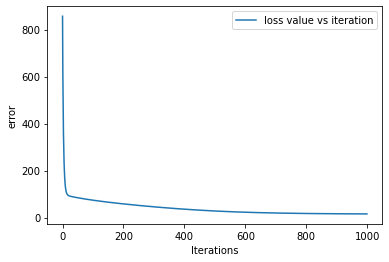

In [6]:
ann_2 = ANN(alpha=0.0001, hidden_size=4)
N = 1000
iterations = []
for i in range(N):
    ann_2.feed_forward()
    ann_2.back_propagation()
    iterations.append(i)
    
print(ann_2.loss[-1])
plt.plot(iterations, ann_2.loss, label='loss value vs iteration')
plt.xlabel('Iterations')
plt.ylabel('error')
plt.legend()
plt.show()